In [532]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.utils import shuffle

In [533]:
df = pd.read_csv(r'C:\Users\86198\Desktop\voice.csv')
all_df=shuffle(df)
testify_df=pd.read_csv(r'C:\Users\86198\Desktop\test.csv')

In [534]:
testify_df[:]

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,sex
0,0.181569,0.029671,0.181592,0.165825,0.194913,0.029087,2.540699,9.217390,0.833229,0.200235,...,0.181569,0.170543,0.017877,0.275862,0.641827,0.148438,6.742188,6.593750,0.147156,male
1,0.180087,0.041149,0.183573,0.161142,0.208066,0.046924,2.122633,7.106722,0.872342,0.321003,...,0.180087,0.167477,0.019277,0.225352,0.622685,0.148438,6.765625,6.617188,0.138770,male
2,0.189543,0.030152,0.190260,0.170318,0.205082,0.034764,2.502136,9.982314,0.839879,0.183603,...,0.189543,0.171550,0.018286,0.238806,0.848090,0.062500,6.992188,6.929688,0.114517,male
3,0.190992,0.034421,0.194454,0.175902,0.212319,0.036417,1.906909,5.801934,0.854398,0.250925,...,0.190992,0.170361,0.048338,0.222222,0.517188,0.140625,6.859375,6.718750,0.106059,male
4,0.190694,0.030125,0.192189,0.182249,0.202130,0.019882,3.417732,15.712113,0.802090,0.211178,...,0.190694,0.188295,0.076555,0.250000,0.604818,0.156250,5.210938,5.054688,0.093157,male
5,0.141926,0.065761,0.123570,0.100430,0.199471,0.099041,2.246075,8.945840,0.942850,0.661927,...,0.141926,0.102725,0.015920,0.216216,0.498047,0.000000,6.515625,6.515625,0.136531,male
6,0.127378,0.071382,0.114783,0.069565,0.187826,0.118261,2.556410,12.526559,0.953890,0.717740,...,0.127378,0.097314,0.017837,0.222222,0.280273,0.015625,2.960938,2.945312,0.141821,male
7,0.144835,0.063841,0.123615,0.106193,0.205748,0.099556,2.796760,12.154492,0.927310,0.602538,...,0.144835,0.096780,0.016736,0.271186,0.096788,0.015625,0.140625,0.125000,0.272059,male
8,0.148996,0.067137,0.134070,0.106998,0.208324,0.101326,2.041382,7.800996,0.944649,0.643151,...,0.148996,0.115004,0.024768,0.250000,0.553879,0.000000,4.679688,4.679688,0.141903,male
9,0.156233,0.063987,0.140000,0.114400,0.217200,0.102800,2.045659,8.360334,0.931758,0.582422,...,0.156233,0.117306,0.017058,0.246154,0.289062,0.000000,3.281250,3.281250,0.131548,male


In [535]:
#去除掉表格中无用的列字段，主要保留一些和生还率有关的列内容
#cols = ['survived', 'name', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']
#all_df = all_df[cols]


In [536]:
mask = np.random.random(len(all_df)) < 0.8
train_df = all_df[mask]
test_df = all_df[~mask]

In [537]:
def PreprocessData(df):
    mode_mean = df['mode'].mean()
    df['mode'] = df['mode'].fillna(mode_mean)
    dfrange_mean = df['dfrange'].mean()
    df['dfrange'] = df['dfrange'].fillna(mode_mean)
    modindx_mean = df['modindx'].mean()
    df['modindx'] = df['modindx'].fillna(mode_mean)
    df['sex'] = df['sex'].map({'female':0, 'male':1})
    array = df.values
    Label = array[:, -1]
    Features = array[:,:20]
    minmax_scale = preprocessing.MinMaxScaler((0,1))
    scaledFeatures = minmax_scale.fit_transform(Features)
    return scaledFeatures, Label

In [538]:
train_Feature, train_label = PreprocessData(train_df)
test_Features, test_label = PreprocessData(test_df)

C:\Users\86198\anaconda3\envs\tensorflowcpu\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\86198\anaconda3\envs\tensorflowcpu\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\86198\anaconda3\envs\tensorflowcpu\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [539]:
all_df[-5:]

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,sex
310,0.197426,0.054829,0.196187,0.156416,0.241830,0.085415,2.336614,9.988687,0.894157,0.178963,...,0.197426,0.136302,0.043836,0.271186,0.283967,0.007812,0.578125,0.570312,0.305729,male
1225,0.204048,0.061342,0.236210,0.135845,0.258904,0.123059,1.794243,5.461880,0.862676,0.222309,...,0.204048,0.125374,0.049741,0.279070,0.565625,0.023438,2.812500,2.789062,0.095951,male
466,0.183967,0.047837,0.186222,0.144172,0.223933,0.079762,1.620491,5.719073,0.904728,0.153505,...,0.183967,0.108979,0.019277,0.275862,0.620605,0.140625,4.679688,4.539062,0.029506,male
1547,0.165113,0.060920,0.133009,0.117278,0.227391,0.110112,2.806798,13.195741,0.910558,0.408569,...,0.165113,0.114636,0.026882,0.270270,0.537109,0.004883,0.952148,0.947266,0.384255,male
1799,0.163239,0.053881,0.172495,0.160134,0.188040,0.027906,3.498124,19.286248,0.881285,0.415102,...,0.163239,0.168612,0.054795,0.213333,0.695913,0.023438,6.929688,6.906250,0.151822,female


建立多层感知器模型并进行预测

In [540]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [541]:
model = Sequential()

In [542]:
model.add(Dense(units=200, input_dim=20, kernel_initializer='normal', activation='relu'))

In [543]:
model.add(Dense(units=200, kernel_initializer='normal', activation='relu'))

In [544]:
model.add(Dense(units=1, kernel_initializer='normal', activation='sigmoid'))

In [545]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [546]:
train_history = model.fit(train_Feature, train_label, validation_split=0.2, epochs=10, batch_size=20, verbose=2)

Train on 2044 samples, validate on 512 samples
Epoch 1/10
 - 1s - loss: 0.4598 - acc: 0.8361 - val_loss: 0.2385 - val_acc: 0.9121
Epoch 2/10
 - 0s - loss: 0.1502 - acc: 0.9565 - val_loss: 0.0991 - val_acc: 0.9668
Epoch 3/10
 - 0s - loss: 0.1070 - acc: 0.9653 - val_loss: 0.0899 - val_acc: 0.9687
Epoch 4/10
 - 0s - loss: 0.0927 - acc: 0.9692 - val_loss: 0.0810 - val_acc: 0.9707
Epoch 5/10
 - 0s - loss: 0.0813 - acc: 0.9760 - val_loss: 0.0824 - val_acc: 0.9727
Epoch 6/10
 - 0s - loss: 0.0789 - acc: 0.9726 - val_loss: 0.1262 - val_acc: 0.9570
Epoch 7/10
 - 0s - loss: 0.0770 - acc: 0.9760 - val_loss: 0.1293 - val_acc: 0.9512
Epoch 8/10
 - 0s - loss: 0.0878 - acc: 0.9692 - val_loss: 0.0817 - val_acc: 0.9687
Epoch 9/10
 - 0s - loss: 0.0774 - acc: 0.9765 - val_loss: 0.0822 - val_acc: 0.9687
Epoch 10/10
 - 0s - loss: 0.0743 - acc: 0.9765 - val_loss: 0.0847 - val_acc: 0.9668


In [547]:
import matplotlib.pyplot as plt
def show_train_history(history, train, validation):
    plt.plot(history.history[train])
    plt.plot(history.history[validation])
    plt.title("Train History")
    plt.xlabel("Epochs")
    plt.ylabel(train)
    plt.legend(['train', 'validaiton'], loc = 'upper left')
    plt.show()

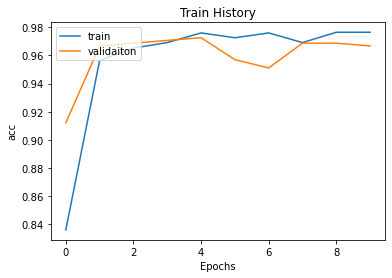

In [548]:
show_train_history(train_history, 'acc', 'val_acc')

In [549]:
scores = model.evaluate(test_Features, test_label)
print(scores)

612/612 [==============================] - 0s 28us/step
[0.08877634266817491, 0.9705882352941176]


In [550]:
all_Features, Label = PreprocessData(all_df)

In [551]:
all_probability = model.predict(all_Features)

In [553]:
all_probability[-5:]

array([[0.91447353],
       [0.9989505 ],
       [0.99954414],
       [0.99682355],
       [0.00439668]], dtype=float32)

In [554]:
all_df.insert(len(all_df.columns), 'probability', all_probability)

In [556]:
all_df[-5:]

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,sex,probability
310,0.197426,0.054829,0.196187,0.156416,0.241830,0.085415,2.336614,9.988687,0.894157,0.178963,...,0.136302,0.043836,0.271186,0.283967,0.007812,0.578125,0.570312,0.305729,1,0.914474
1225,0.204048,0.061342,0.236210,0.135845,0.258904,0.123059,1.794243,5.461880,0.862676,0.222309,...,0.125374,0.049741,0.279070,0.565625,0.023438,2.812500,2.789062,0.095951,1,0.998950
466,0.183967,0.047837,0.186222,0.144172,0.223933,0.079762,1.620491,5.719073,0.904728,0.153505,...,0.108979,0.019277,0.275862,0.620605,0.140625,4.679688,4.539062,0.029506,1,0.999544
1547,0.165113,0.060920,0.133009,0.117278,0.227391,0.110112,2.806798,13.195741,0.910558,0.408569,...,0.114636,0.026882,0.270270,0.537109,0.004883,0.952148,0.947266,0.384255,1,0.996824
1799,0.163239,0.053881,0.172495,0.160134,0.188040,0.027906,3.498124,19.286248,0.881285,0.415102,...,0.168612,0.054795,0.213333,0.695913,0.023438,6.929688,6.906250,0.151822,0,0.004397


In [557]:
testify_df[-5:]

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,sex
5,0.141926,0.065761,0.123570,0.100430,0.199471,0.099041,2.246075,8.945840,0.942850,0.661927,...,0.141926,0.102725,0.015920,0.216216,0.498047,0.000000,6.515625,6.515625,0.136531,male
6,0.127378,0.071382,0.114783,0.069565,0.187826,0.118261,2.556410,12.526559,0.953890,0.717740,...,0.127378,0.097314,0.017837,0.222222,0.280273,0.015625,2.960938,2.945312,0.141821,male
7,0.144835,0.063841,0.123615,0.106193,0.205748,0.099556,2.796760,12.154492,0.927310,0.602538,...,0.144835,0.096780,0.016736,0.271186,0.096788,0.015625,0.140625,0.125000,0.272059,male
8,0.148996,0.067137,0.134070,0.106998,0.208324,0.101326,2.041382,7.800996,0.944649,0.643151,...,0.148996,0.115004,0.024768,0.250000,0.553879,0.000000,4.679688,4.679688,0.141903,male
9,0.156233,0.063987,0.140000,0.114400,0.217200,0.102800,2.045659,8.360334,0.931758,0.582422,...,0.156233,0.117306,0.017058,0.246154,0.289062,0.000000,3.281250,3.281250,0.131548,male


In [558]:
testify_Features, testify_label = PreprocessData(testify_df)

In [559]:
testify_probability = model.predict(testify_Features)

In [561]:
testify_probability[:]

array([[3.7312508e-05],
       [6.6244602e-04],
       [1.9282103e-05],
       [4.1648746e-04],
       [3.5762787e-06],
       [9.9996430e-01],
       [9.9999171e-01],
       [9.9999803e-01],
       [9.9996269e-01],
       [9.9996674e-01]], dtype=float32)